# Problem Statement: Exploring Classification from First Principles
##Introduction:

Given a dataset (lab_dataset.csv) that contains points in a 2D space. Each point belongs to one of two classes. Goal is to explore the dataset, visualize the data points, and then attempt to classify the points into their respective classes using first principles.

## Dataset:

The file lab_dataset.csv contains three columns:

X coordinate: The x-position of the point.

Y coordinate: The y-position of the point.

Label: The class of the point, where 1 represents one class and -1 represents the other.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

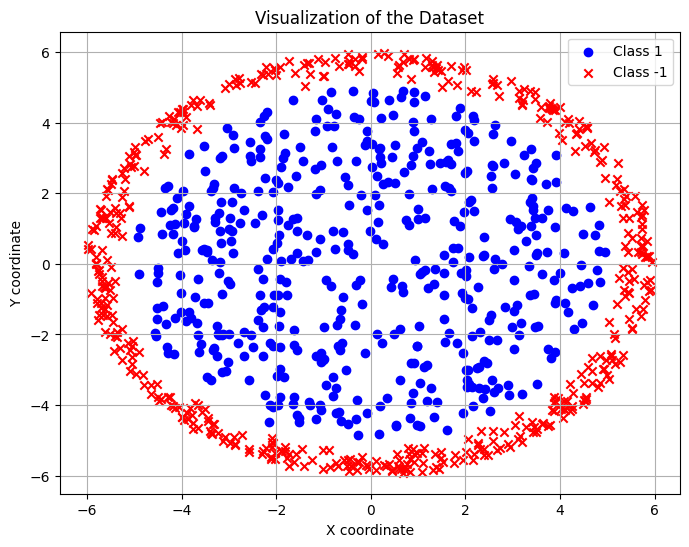

In [6]:
# Function to read and plot the dataset
def plot_dataset(file_path):
    # Read the dataset
    data = np.genfromtxt(file_path, delimiter=',', skip_header=1)
    X = data[:, 0]  # X coordinates
    Y = data[:, 1]  # Y coordinates
    labels = data[:, 2]  # Class labels

    # Plotting the points
    plt.figure(figsize=(8, 6))
    plt.scatter(X[labels == 1], Y[labels == 1], color='blue', marker='o', label='Class 1')
    plt.scatter(X[labels == -1], Y[labels == -1], color='red', marker='x', label='Class -1')
    plt.title('Visualization of the Dataset')
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.legend()
    plt.grid(True)
    plt.show()
  # Example usage
plot_dataset('dataset.csv')

In [7]:
# Function to classify the dataset with ax + by + c = 0 line
def classify_dataset(X, y, learning_rate=0.01, max_iterations=1000):
    # Initialize line coefficients (a, b for x and y coefficients, and c for the intercept)
    a, b, c = np.random.randn(3)

    # Iteratively adjust the line
    for _ in range(max_iterations):
        misclassified = 0
        for i in range(len(X)):
            # Predict the label based on current line ax + by + c = 0
            predicted_label = 1 if a * X[i][0] + b * X[i][1] + c > 0 else -1
            if predicted_label != y[i]:
                # Update coefficients based on the error
                misclassified += 1
                a += learning_rate * (y[i] - predicted_label) * X[i][0]
                b += learning_rate * (y[i] - predicted_label) * X[i][1]
                c += learning_rate * (y[i] - predicted_label)


        # If no misclassified points, break the loop
        if misclassified == 0:
            break

    return a, b, c


In [8]:
# Function to plot the classification boundary with ax + by + c = 0
def plot_classification_boundary(X, y, a, b, c):
    # Extract X and Y coordinates for plotting
    X_coords = X[:, 0]
    Y_coords = X[:, 1]

    # Get the limits for consistent scale
    x_min, x_max = np.min(X_coords), np.max(X_coords)
    y_min, y_max = np.min(Y_coords), np.max(Y_coords)

    # Plot the points
    plt.figure(figsize=(8, 6))
    plt.scatter(X_coords[y == 1], Y_coords[y == 1], color='blue', marker='o', label='Class 1')
    plt.scatter(X_coords[y == -1], Y_coords[y == -1], color='red', marker='x', label='Class -1')

    # Plot the classification boundary (line) ax + by + c = 0
    x_values = np.linspace(x_min, x_max, 100)

    # Handle case where `b` (coefficient of y) is not zero, to avoid division by zero
    if b != 0:
        y_values = -(a * x_values + c) / b
        plt.plot(x_values, y_values, color='green', label='Decision Boundary')
    else:
        # If `b` is zero, we plot a vertical line for `ax + c = 0`
        plt.axvline(-c / a, color='green', label='Decision Boundary')

    # Set axis limits to match the scale of plot_dataset
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # Customize the plot
    plt.title('Classification Boundary with Consistent Scale (ax + by + c = 0)')
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.legend()
    plt.grid(True)
    plt.show()


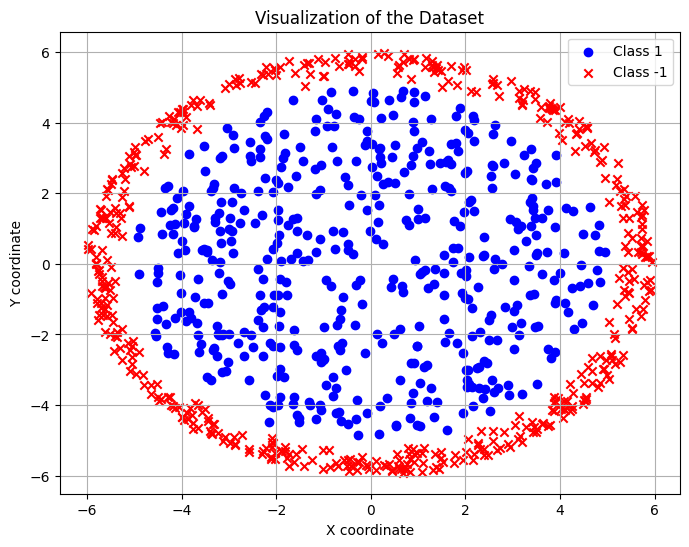

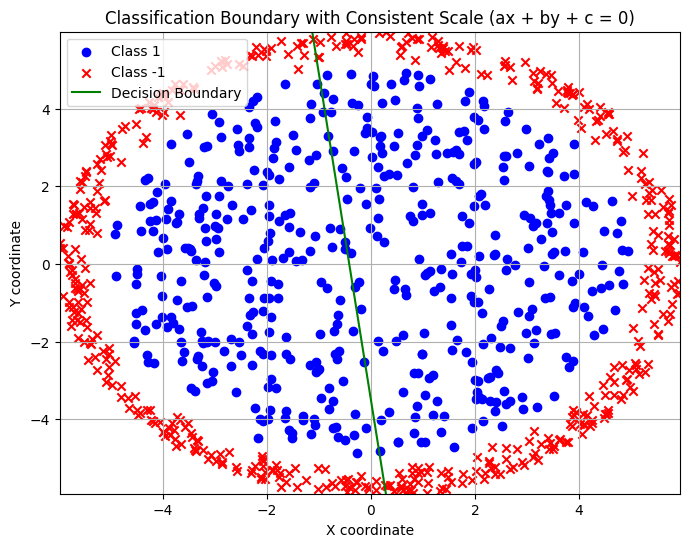

Final Line: 0.1044x + 0.0124y + 0.0434 = 0


In [10]:
# Load the dataset
data = np.genfromtxt('dataset.csv', delimiter=',', skip_header=1)
X = data[:, 0:2]  # X and Y coordinates
y = data[:, 2]    # Labels

# Plot the original dataset
plot_dataset('dataset.csv')

# Classify the points using the linear classifier ax + by + c = 0
a, b, c = classify_dataset(X, y)

# Plot the classification boundary along with the points
plot_classification_boundary(X, y, a, b, c)

print(f'Final Line: {a:.4f}x + {b:.4f}y + {c:.4f} = 0')